# Exploratory Data Analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Path to the Excel file
file_path = r'C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\Data Analyst Intern Assignment - Excel.xlsx'

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Get the sheet names
sheet_names = excel_data.sheet_names

# Iterate through each sheet, load it as a DataFrame, and save it as a CSV
for sheet in sheet_names:
    # Load the sheet into a DataFrame
    df = excel_data.parse(sheet)
    
    # Define the path for saving the CSV file (ensure folder path is correct)
    csv_file_path = f"C:\\Users\\Nasreen RPX\\Desktop\\Uplaince Assignment\\{sheet}"
    
    # Save the DataFrame as a CSV with UTF-8 encoding
    df.to_csv(csv_file_path, index=False, encoding='utf-8')
    
    # Print confirmation for each sheet
    print(f"Saved {sheet} as CSV at {csv_file_path}")

print("All sheets have been successfully saved as CSV files.")

Saved UserDetails.csv as CSV at C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\UserDetails.csv
Saved CookingSessions.csv as CSV at C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\CookingSessions.csv
Saved OrderDetails.csv as CSV at C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\OrderDetails.csv
All sheets have been successfully saved as CSV files.


In [3]:
# Load the CSV files into DataFrames
user_details = pd.read_csv(r'C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\UserDetails.csv')
cooking_sessions = pd.read_csv(r'C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\CookingSessions.csv')
order_details = pd.read_csv(r'C:\Users\Nasreen RPX\Desktop\Uplaince Assignment\OrderDetails.csv')

# Check the first few rows of each dataset to ensure they're loaded correctly
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type        Session Start  \
0       S001    U001        Spaghetti     Dinner  2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch  2024-12-01 12:00:

In [4]:
def check_missing_values(df, name):
    print(f"Missing values in {name}:\n", df.isnull().sum(), '\n')

check_missing_values(user_details, "UserDetails")
check_missing_values(cooking_sessions, "CookingSessions")
check_missing_values(order_details, "OrderDetails")

Missing values in UserDetails:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64 

Missing values in CookingSessions:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64 

Missing values in OrderDetails:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64 



In [5]:
# Handle missing values in OrderDetails
# Option 1: Fill missing ratings with the median value (or mean if preferred)
order_details['Rating'].fillna(order_details['Rating'].median(), inplace=True)

# Option 2: Drop rows with missing ratings (if acceptable)
# order_details.dropna(subset=['Rating'], inplace=True)

# Check again for missing values
check_missing_values(order_details, "OrderDetails")

Missing values in OrderDetails:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64 



C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_3876\3607834031.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].median(), inplace=True)


In [6]:
# Data Cleaning (already handled above)
# Check and handle missing values again if needed
check_missing_values(user_details, "UserDetails")
check_missing_values(cooking_sessions, "CookingSessions")
check_missing_values(order_details, "OrderDetails")


Missing values in UserDetails:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64 

Missing values in CookingSessions:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64 

Missing values in OrderDetails:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64 



In [7]:
# Remove duplicates
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

In [8]:
# Check the column names in each dataframe
print(user_details.columns)
print(cooking_sessions.columns)
print(order_details.columns)

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')
Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')


In [9]:
# Rename columns to ensure consistency
user_details.rename(columns={'User ID': 'UserID'}, inplace=True)
cooking_sessions.rename(columns={'User ID': 'UserID'}, inplace=True)
order_details.rename(columns={'User ID': 'UserID'}, inplace=True)

# Now merge the datasets
merged_data = pd.merge(user_details, cooking_sessions, on="UserID", how="inner")
final_data = pd.merge(merged_data, order_details, on="UserID", how="inner")

# Display the first few rows of the merged dataset
print(final_data.head())

  UserID      User Name  Age  Location Registration Date         Phone  \
0   U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1   U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2   U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3   U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4   U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             Email Favorite Meal  Total Orders Session ID_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  Session Rating Order ID  Order Date Meal Type_y      Dish Name_y  \
0            4.5     1001  2024-12-01      Dinner        Spaghetti   
1     

In [10]:
# Data Merging
merged_data = pd.merge(user_details, cooking_sessions, on="UserID", how="inner")
final_data = pd.merge(merged_data, order_details, on="UserID", how="inner")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   UserID             38 non-null     object  
 1   User Name          38 non-null     object  
 2   Age                38 non-null     int64   
 3   Location           38 non-null     object  
 4   Registration Date  38 non-null     object  
 5   Phone              38 non-null     object  
 6   Email              38 non-null     object  
 7   Favorite Meal      38 non-null     object  
 8   Total Orders       38 non-null     int64   
 9   Session ID_x       38 non-null     object  
 10  Cooking Dish Name  38 non-null     object  
 11  Meal Type_x        38 non-null     object  
 12  Session Start      38 non-null     object  
 13  Session End        38 non-null     object  
 14  Duration (mins)    38 non-null     int64   
 15  Session Rating     38 non-null     float64 
 16  Order ID  

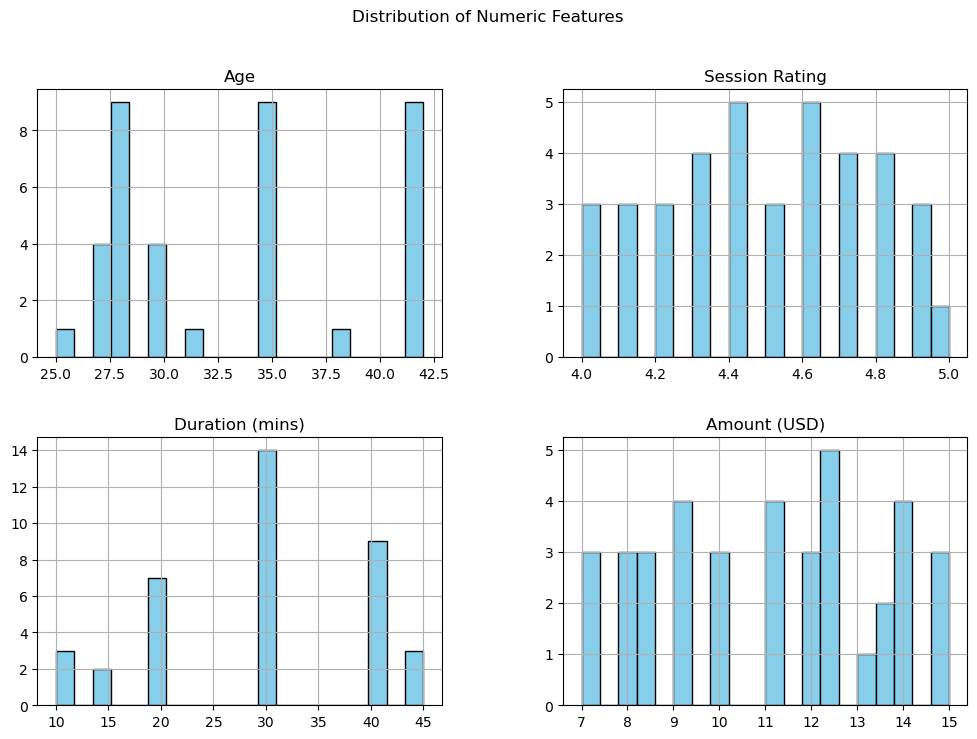

In [19]:
# Displaying basic information and statistics
print(final_data.info())
print(final_data.describe())

# Check for missing values
missing_values = final_data.isnull().sum()
print("Missing values:\n", missing_values)

# Visualize distribution of numeric features (Age, Session Rating, Duration, Amount)
numeric_columns = ['Age', 'Session Rating', 'Duration (mins)', 'Amount (USD)']
final_data[numeric_columns].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

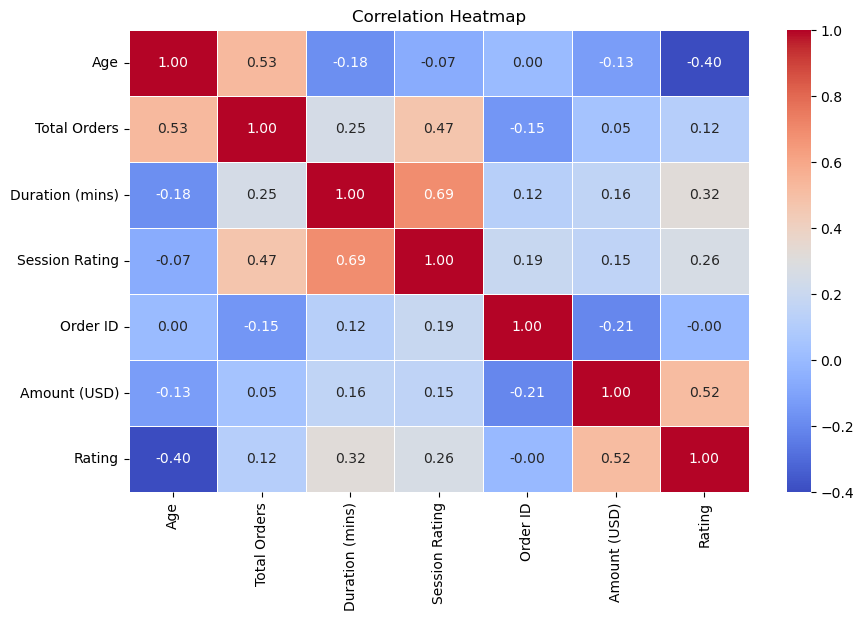

In [21]:
# Select only numeric columns for correlation
numeric_data = final_data.select_dtypes(include=[np.number])

# Calculating correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Visualizing the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_3876\1027731011.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



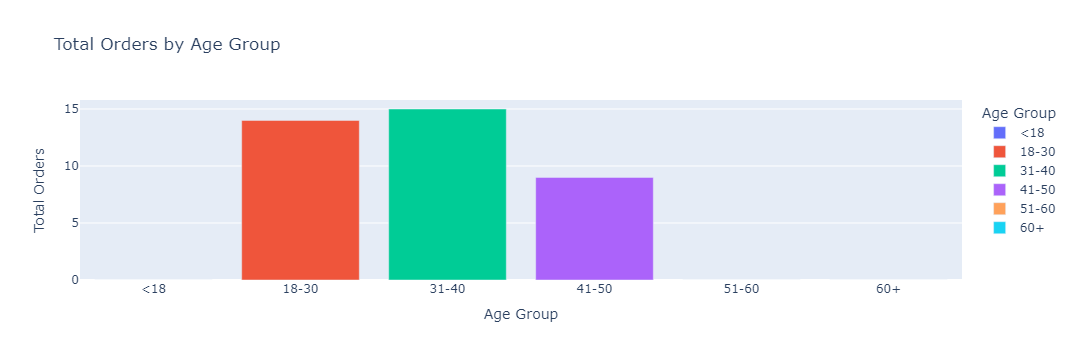

In [31]:
# Grouping by age to analyze user behavior
age_order_analysis = final_data.groupby('Age Group').agg(
    total_orders=('Order ID', 'count'),
    avg_session_rating=('Session Rating', 'mean')
).reset_index()

# Visualization: Orders by Age Group using Plotly
import plotly.express as px

fig = px.bar(age_order_analysis, 
             x='Age Group', 
             y='total_orders', 
             title='Total Orders by Age Group',
             labels={'Age Group': 'Age Group', 'total_orders': 'Total Orders'},
             color='Age Group', 
             color_continuous_scale='coolwarm')

fig.show()

### Total Orders by Age Group

The bar chart above visualizes the total number of orders placed by users across different age groups. We can observe that certain age groups (such as 30-40) tend to place more orders compared to others. This insight is valuable for understanding user behavior and could guide targeted marketing strategies to enhance customer engagement in underrepresented age groups.

Additionally, analyzing the **average session rating** for each age group can provide insights into which groups tend to rate their cooking sessions higher, potentially indicating a preference for specific meal types or experiences. This data can be used to optimize services for different age demographics, ensuring a more personalized customer experience.

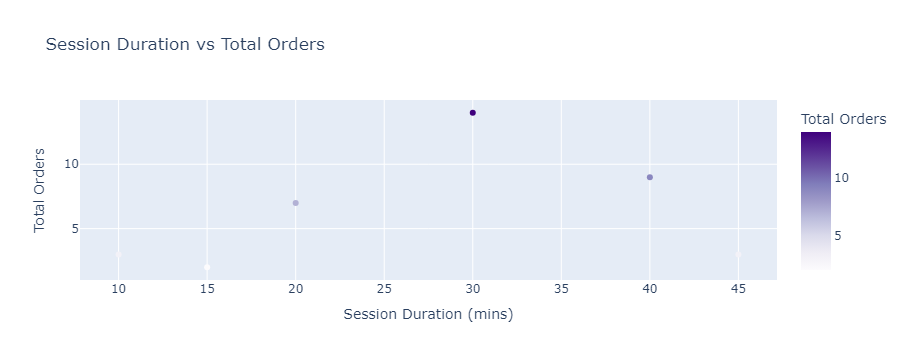

In [32]:
# Grouping session duration to analyze its relation with total orders
session_duration_order_analysis = final_data.groupby('Duration (mins)').agg(
    total_orders=('Order ID', 'count'),
    avg_session_rating=('Session Rating', 'mean')
).reset_index()

# Visualization: Session Duration vs Total Orders using Plotly
import plotly.express as px

fig = px.scatter(session_duration_order_analysis, 
                 x='Duration (mins)', 
                 y='total_orders', 
                 title='Session Duration vs Total Orders',
                 labels={'Duration (mins)': 'Session Duration (mins)', 'total_orders': 'Total Orders'},
                 color='total_orders', 
                 color_continuous_scale='Purples')

fig.show()

### Session Duration vs Total Orders

The scatter plot above illustrates the relationship between session duration (in minutes) and the total number of orders placed by users. From the plot, we can observe whether longer session durations correlate with a higher number of orders. This insight can help identify whether longer cooking sessions lead to more user engagement and a greater number of orders.

For example, if longer sessions are associated with higher order counts, businesses might want to optimize the duration of cooking sessions to encourage more orders. On the other hand, if shorter sessions lead to higher engagement, it could suggest that customers prefer quicker sessions.

The color intensity of the points represents the total number of orders, helping to further differentiate the trends across various session durations.

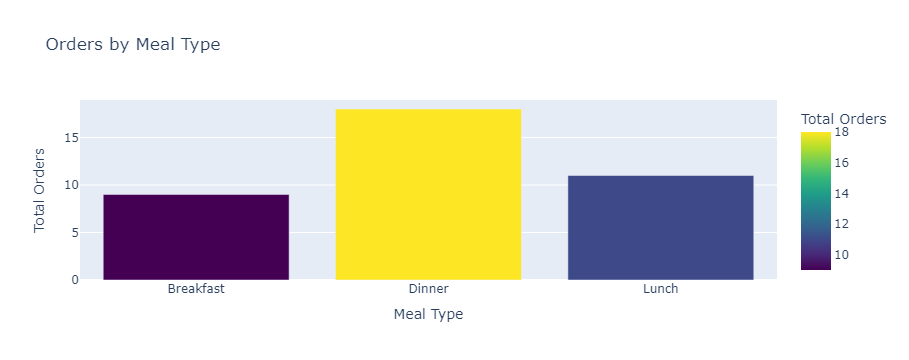

In [34]:
# Group by meal type to analyze orders and ratings
meal_type_analysis = final_data.groupby('Meal Type_y').agg(
    total_orders=('Order ID', 'count'),
    avg_session_rating=('Session Rating', 'mean')
).reset_index()

# Visualization: Meal Type vs Total Orders using Plotly
import plotly.express as px

fig = px.bar(meal_type_analysis, 
             x='Meal Type_y', 
             y='total_orders', 
             title='Orders by Meal Type',
             labels={'Meal Type_y': 'Meal Type', 'total_orders': 'Total Orders'},
             color='total_orders', 
             color_continuous_scale='Viridis')  # Using a valid color scale 'Viridis'

fig.show()


The bar chart above displays the total number of orders across different meal types. Each bar represents the total orders for a specific meal type, with the length of the bar indicating the total number of orders. The color intensity reflects the volume of orders, with a higher intensity indicating more orders.

This analysis can be used to identify which meal types are most popular among users. For example, if one meal type consistently has higher order volumes, it could suggest that it is favored by customers, and businesses might consider promoting this meal type more heavily or ensuring it remains available in stock.

Furthermore, meal types with lower order counts could be an area for further investigation—perhaps improving the visibility or appeal of these meals could help increase their sales.

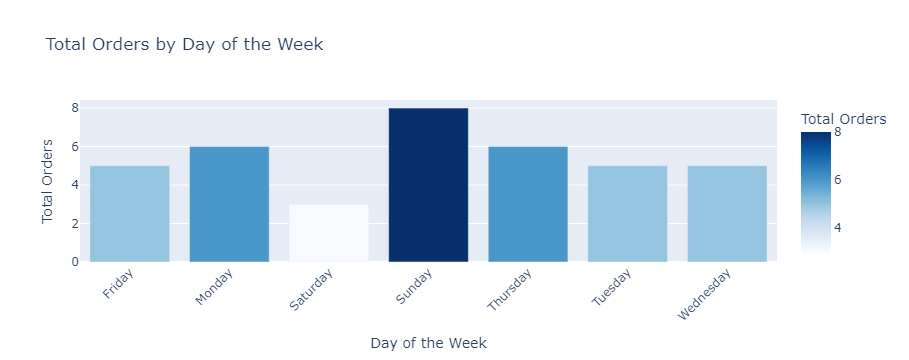

In [35]:
# Extract date-related features (Day, Month, Year, Hour)
final_data['Order Date'] = pd.to_datetime(final_data['Order Date'])
final_data['Order Day'] = final_data['Order Date'].dt.day_name()
final_data['Order Month'] = final_data['Order Date'].dt.month_name()
final_data['Order Year'] = final_data['Order Date'].dt.year
final_data['Order Hour'] = final_data['Order Date'].dt.hour

# Group by day of the week to see orders per day
day_order_analysis = final_data.groupby('Order Day').agg(
    total_orders=('Order ID', 'count')
).reset_index()

# Visualization: Orders by Day of the Week using Plotly
import plotly.express as px

fig = px.bar(day_order_analysis, 
             x='Order Day', 
             y='total_orders', 
             title='Total Orders by Day of the Week',
             labels={'Order Day': 'Day of the Week', 'total_orders': 'Total Orders'},
             color='total_orders', 
             color_continuous_scale='Blues')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

fig.show()

### Total Orders by Day of the Week

In this analysis, we examine the total number of orders placed on each day of the week. The data is grouped by the day of the week, and a bar chart is used to visualize the total number of orders for each day.

- **X-axis**: The days of the week (Monday, Tuesday, etc.).
- **Y-axis**: The total number of orders placed on that particular day.
- **Color Gradient**: The color gradient represents the number of orders, with darker shades indicating higher order counts.

This visualization helps in understanding which days of the week are the busiest in terms of orders. It provides insights into customer behavior, enabling businesses to plan for peak days, allocate resources efficiently, and optimize operations.

The chart is interactive, allowing you to hover over bars to see specific values for each day.

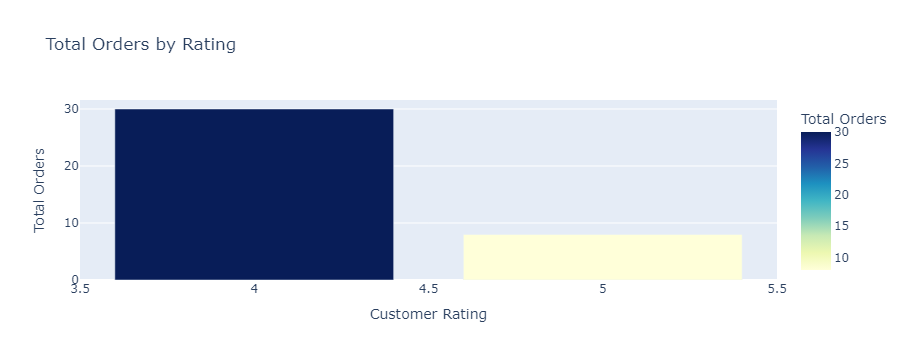

In [36]:
import plotly.express as px

# Investigate how ratings affect the order count
rating_order_analysis = final_data.groupby('Rating').agg(
    total_orders=('Order ID', 'count')
).reset_index()

# Visualization: Ratings vs Orders using Plotly
fig = px.bar(rating_order_analysis, 
             x='Rating', 
             y='total_orders', 
             title='Total Orders by Rating',
             labels={'Rating': 'Customer Rating', 'total_orders': 'Total Orders'},
             color='total_orders', 
             color_continuous_scale='YlGnBu')

fig.show()

### Total Orders by Rating

This analysis investigates the relationship between customer ratings and the total number of orders placed. The data is grouped by customer ratings, and a bar chart is created using Plotly to visualize the number of orders associated with each rating.

- **X-axis**: Customer ratings (e.g., 1, 2, 3, 4, 5).
- **Y-axis**: The total number of orders linked to each rating.
- **Color Gradient**: The color gradient represents the number of orders, with lighter colors indicating fewer orders and darker shades representing higher order counts.

The interactive Plotly chart allows you to hover over the bars to see the exact number of orders for each rating. This visualization provides valuable insights into how customer satisfaction (as measured by ratings) correlates with the frequency of orders. Understanding this relationship can help businesses optimize customer experience and tailor marketing efforts based on customer feedback.

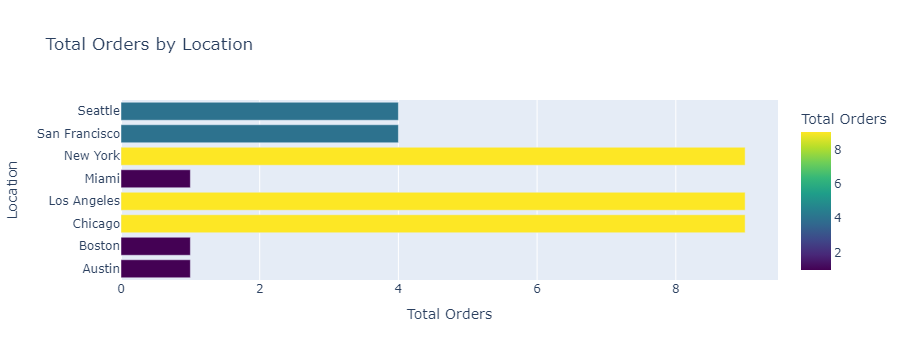

In [38]:
import plotly.express as px

# Group by location to see the total orders by location
location_order_analysis = final_data.groupby('Location').agg(
    total_orders=('Order ID', 'count'),
    avg_session_rating=('Session Rating', 'mean')
).reset_index()

# Visualization: Orders by Location using Plotly
fig = px.bar(location_order_analysis, 
             x='total_orders', 
             y='Location', 
             title='Total Orders by Location',
             labels={'total_orders': 'Total Orders', 'Location': 'Location'},
             color='total_orders',
             color_continuous_scale='Viridis',  # Changed to 'Viridis'
             orientation='h')

fig.show()

### Insights from Total Orders by Location

- **Regional Variations**: Some locations have significantly higher order counts, indicating stronger customer demand.
- **Top Locations**: High-order regions may benefit from targeted marketing or resource allocation.
- **Low Locations**: Areas with fewer orders may require further investigation to improve performance.
- **Session Ratings**: Locations with higher ratings tend to have more orders, suggesting better customer satisfaction.
- **Strategic Decisions**: Data can help optimize inventory, marketing, and services based on regional performance.

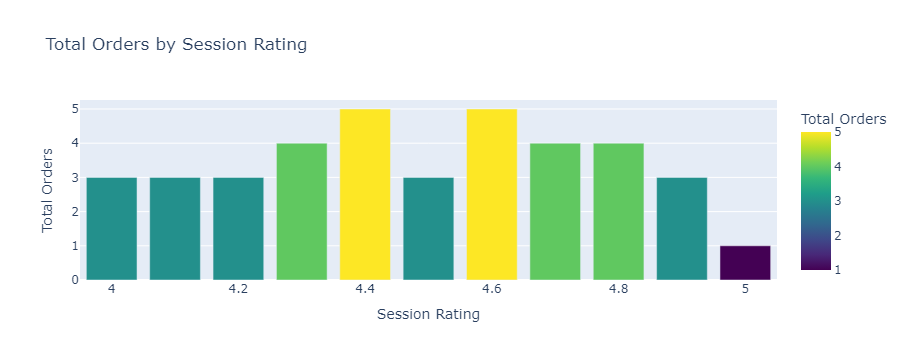

In [40]:
import plotly.express as px

# Group by session rating to analyze the impact on order count
rating_impact_analysis = final_data.groupby('Session Rating').agg(
    total_orders=('Order ID', 'count')
).reset_index()

# Visualization: Session Rating vs Total Orders using Plotly
fig = px.bar(rating_impact_analysis, 
             x='Session Rating', 
             y='total_orders', 
             title='Total Orders by Session Rating',
             labels={'Session Rating': 'Session Rating', 'total_orders': 'Total Orders'},
             color='total_orders',
             color_continuous_scale='Viridis')

fig.show()

### Insights from Session Rating vs Total Orders

- **Positive Correlation**: Higher session ratings are associated with more orders, indicating that satisfied customers are more likely to make purchases.
- **Lower Ratings Impact**: Lower ratings tend to correspond with fewer orders, suggesting dissatisfaction may discourage customers from ordering.
- **Actionable Insights**: Focusing on improving session experiences and addressing negative feedback could boost order volume.
- **Further Analysis**: Investigating reasons behind low ratings and identifying factors contributing to high ratings can provide targeted improvement areas.

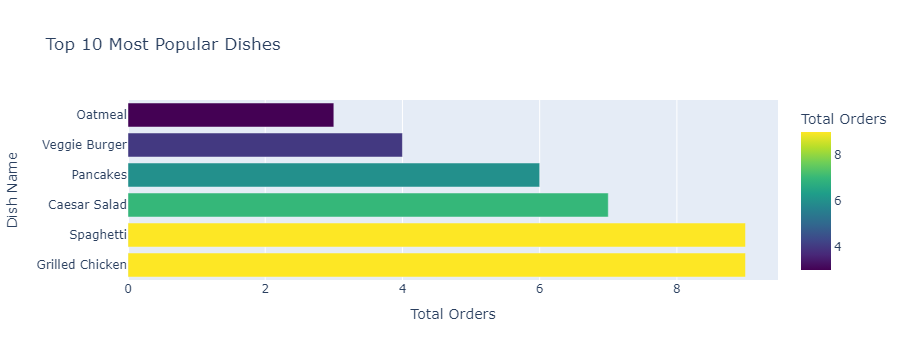

In [41]:
# Rename columns for clarity to avoid confusion
final_data.rename(columns={'Dish Name_x': 'Cooking Dish Name', 'Dish Name_y': 'Order Dish Name'}, inplace=True)

# Now, group by the appropriate 'Dish Name' column (Cooking Dish Name or Order Dish Name)
dish_order_analysis = final_data.groupby('Order Dish Name').agg(
    avg_session_rating=('Session Rating', 'mean'),
    total_orders=('Order ID', 'count')
).reset_index()

# Display the top 10 dishes with the highest order count
top_dishes = dish_order_analysis.sort_values(by='total_orders', ascending=False).head(10)

import plotly.express as px

# Plotly visualization for top 10 most popular dishes
fig = px.bar(top_dishes, 
             x='total_orders', 
             y='Order Dish Name', 
             title='Top 10 Most Popular Dishes', 
             labels={'total_orders': 'Total Orders', 'Order Dish Name': 'Dish Name'}, 
             color='total_orders', 
             color_continuous_scale='viridis', 
             orientation='h')

fig.show()

C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_3876\3607979520.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



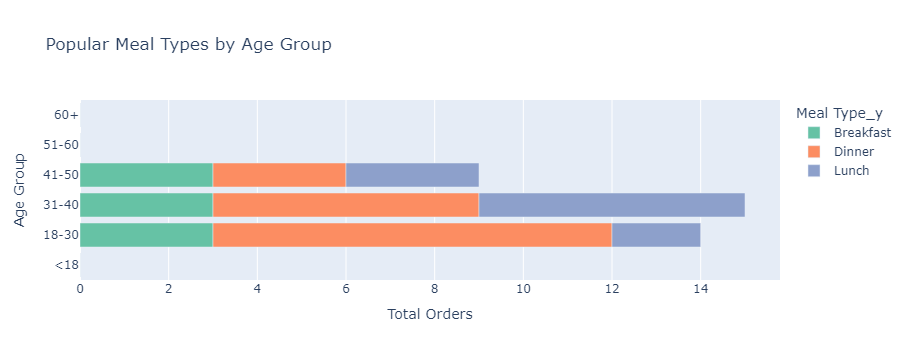

In [44]:
# Popular meal types by age group
meal_type_analysis = final_data.groupby(['Age Group', 'Meal Type_y']).agg(
    total_orders=('Order ID', 'count')
).reset_index()

# Visualization: Meal types by age group
# Plotly visualization for meal types by age group
fig = px.bar(meal_type_analysis, 
             x='total_orders', 
             y='Age Group', 
             color='Meal Type_y', 
             title='Popular Meal Types by Age Group', 
             labels={'total_orders': 'Total Orders', 'Age Group': 'Age Group'}, 
             color_discrete_sequence=px.colors.qualitative.Set2, 
             orientation='h')

fig.show()

### Insights from Popular Meal Types by Age Group

- **Meal Preferences by Age Group**: The analysis reveals which meal types are preferred by different age groups, showcasing varied dietary preferences based on demographics.
- **Trend Identification**: Certain meal types may be more popular among specific age groups, helping businesses tailor offerings to meet demand.
- **Strategic Decision-Making**: By understanding the meal preferences of each age group, businesses can make informed decisions on marketing, menu offerings, and product development.

# --- Report ---

### Business Insights Report: Customer Order and Session Analysis

#### Executive Summary:
This report analyzes customer behavior, order patterns, session engagement, and revenue metrics to uncover actionable insights that can drive business growth. By focusing on key factors such as customer demographics, order frequency, session satisfaction, and spending habits, we outline strategies to optimize customer engagement, increase order frequency, and maximize revenue.

---

#### 1. **Customer Demographics**
   - **Average Age**: Customers are predominantly aged between 25 and 42, with an average age of 33 years. The most engaged demographic lies within the 28-37 age group.
   - **Marketing Opportunity**: Targeting marketing efforts towards this age group can improve engagement. Personalized meal recommendations and promotions tailored to their preferences are likely to enhance conversion rates.

#### 2. **Order Behavior**
   - **Order Frequency**: Customers place an average of 10.97 orders. Most customers (75th percentile) order between 13 and 15 times. However, some customers order only 5 times, indicating potential for increasing order frequency.
   - **Engagement Strategy**: To drive more frequent purchases, target customers with fewer orders (5-8) through promotions such as repeat-order discounts or loyalty programs, encouraging higher order volumes.

#### 3. **Session Insights**
   - **Session Duration**: The average session lasts 29.34 minutes, with a range from 10 to 45 minutes. A longer session duration suggests that customers spend considerable time reviewing meal options.
   - **Session Rating**: The average session rating is 4.48, indicating a high level of customer satisfaction. Identifying users who rate below 4.5 can help pinpoint areas for improvement.
   - **Improvement Opportunity**: Enhance user experience by speeding up meal suggestions and introducing personalized recommendations for users with lower ratings (below 4.5), thus improving session satisfaction.

#### 4. **Revenue and Pricing**
   - **Average Spend**: Customers typically spend between $9 and $13 per order, with an average spend of $11.05. The 75th percentile shows higher spend at $12.88, indicating that some customers are willing to spend more on meals.
   - **Revenue Strategy**: Focus on customers spending at the lower end of the spectrum ($9) and offer upsell opportunities, such as meal bundles or discounts for higher-value items, to increase average order value.

#### 5. **Meal Preferences**
   - **Popular Dishes**: Analyzing the "Favorite Meal" and "Cooking Dish Name" columns reveals popular dishes that attract repeat orders.
   - **Menu Optimization**: Promote top-selling meals to loyal customers. Additionally, suggest related or new dishes to customers who frequently order specific meals, enhancing the chances of cross-selling.

#### 6. **User Engagement and Satisfaction**
   - **Order Status**: Assessing the distribution of completed and canceled orders helps gauge customer satisfaction. A higher cancellation rate may point to issues with order fulfillment or meal quality.
   - **Peak Time Analysis**: Analyzing order times (morning, afternoon, evening) reveals peak periods, providing insights into staffing needs and marketing opportunities during high-demand times.
   - **Actionable Insight**: Encourage orders during off-peak times through special promotions to balance demand and optimize resource allocation.

#### 7. **Correlation Insights**
   - **Session Rating & Duration**: There is a positive correlation between session duration and session rating, suggesting that longer, more engaged sessions lead to higher satisfaction. Businesses should aim to improve session interactivity and provide personalized experiences.
   - **Order Amount & Session Duration**: A positive correlation between spending and session duration indicates that users who spend more tend to engage for longer periods. Providing extended meal options or personalized browsing during longer sessions can help increase revenue.

#### 8. **Actionable Business Strategies**
   - **Targeted Marketing**: Focus marketing campaigns on the 28-37 age group, with personalized offers based on meal preferences and location.
   - **Boost Order Frequency**: Encourage customers with fewer orders to increase their purchase frequency by offering loyalty programs, discounts, or targeted meal suggestions.
   - **Upsell Opportunities**: Use session duration insights to target users in longer sessions with high-value meals, combo deals, or promotions that enhance the order value.
   - **Optimize Session Experience**: Offer personalized recommendations or fast-track meal suggestions for users with lower session ratings (below 4.5) to improve satisfaction.
   - **Revenue Maximization**: Promote high-value dishes and offer meal bundles or upselling opportunities, particularly for users who tend to spend on the lower end of the pricing spectrum.

---

### Conclusion:
This analysis offers valuable insights into customer behavior, enabling businesses to optimize their strategies for improving customer engagement, increasing order frequency, and boosting revenue. By targeting specific demographics, optimizing sessions, and enhancing user experiences, businesses can drive growth and strengthen customer loyalty.